 Instrucciones para examen

Objetivo: 
 Este examen tiene como objetivo evaluar la capacidad del estudiante para limpiar, explorar, implementar y evaluar modelos de regresión en un dataset de precios de casas. Utilizaremos el «House Prices Dataset» disponible en Kaggle. Los estudiantes deben demostrar habilidades prácticas en la manipulación de datos, creación de visualizaciones y modelado predictivo.

 Contexto y Descripción del Dataset

El «House Prices Dataset» contiene datos sobre diversas características de casas residenciales en Ames, Iowa. La tarea es predecir el precio final de cada casa (variable objetivo) en función de sus características.

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1) Limpieza de Datos:

In [137]:
# Carga de los dos datasets
data = pd.read_csv('../data/train.csv')
print(data.shape)
data.head(10)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [138]:
# Identificación y eliminación de valores duplicados
print("Duplicados: ", data.duplicated().sum())

Duplicados:  0


In [139]:
# Verificación y ajuste de tipos de datos:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [140]:
# Creo un diccionario con los tipos de datos deseados y los reemplazo
data_type = {
    'MSZoning' : 'category',
    'Street' : 'category',
    'Utilities' : 'category',
    'BldgType' : 'category',
    'CentralAir' : 'category',
    'HeatingQC' : 'category',
    'BsmtCond' : 'category',
    'SaleCondition' : 'category',
}
data = data.astype(data_type)
print(data.dtypes)

Id                  int64
MSSubClass          int64
MSZoning         category
LotFrontage       float64
LotArea             int64
                   ...   
MoSold              int64
YrSold              int64
SaleType           object
SaleCondition    category
SalePrice           int64
Length: 81, dtype: object


In [141]:
# Corrección de inconsistencias en valores categóricos:
columnas_cat = ['MSZoning', 'Street', 'SaleCondition', 'BldgType', 'Utilities', 'BsmtCond', 'HeatingQC', 'CentralAir']

# Imprimir valores únicos de cada columna
for columna in columnas_cat:
    print(f"Valores únicos en '{columna}': {data[columna].unique()}\n")


Valores únicos en 'MSZoning': ['RL', 'RM', 'C (all)', 'FV', 'RH']
Categories (5, object): ['C (all)', 'FV', 'RH', 'RL', 'RM']

Valores únicos en 'Street': ['Pave', 'Grvl']
Categories (2, object): ['Grvl', 'Pave']

Valores únicos en 'SaleCondition': ['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family']
Categories (6, object): ['Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial']

Valores únicos en 'BldgType': ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs']
Categories (5, object): ['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE']

Valores únicos en 'Utilities': ['AllPub', 'NoSeWa']
Categories (2, object): ['AllPub', 'NoSeWa']

Valores únicos en 'BsmtCond': ['TA', 'Gd', NaN, 'Fa', 'Po']
Categories (4, object): ['Fa', 'Gd', 'Po', 'TA']

Valores únicos en 'HeatingQC': ['Ex', 'Gd', 'TA', 'Fa', 'Po']
Categories (5, object): ['Ex', 'Fa', 'Gd', 'Po', 'TA']

Valores únicos en 'CentralAir': ['Y', 'N']
Categories (2, object): ['N', 'Y']



In [142]:
# Manejo de valores faltantes adecuadamente: 
qsna=data.shape[0]-data.isnull().sum(axis=0)
qna=data.isnull().sum(axis=0)
ppna=round(100*(data.isnull().sum(axis=0)/data.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)


,datos sin NAs en q,Na en q,Na en %
PoolQC,7,1453,99.52
MiscFeature,54,1406,96.30
Alley,91,1369,93.77
Fence,281,1179,80.75
MasVnrType,588,872,59.73
...,...,...,...
ExterQual,1460,0,0.00
Exterior2nd,1460,0,0.00
Exterior1st,1460,0,0.00
RoofMatl,1460,0,0.00


In [143]:
# Defino mis columnas de interes
columnas_num_alimpiar = ['MSSubClass', 'LotArea', 'YearBuilt', 'OverallCond',
                      'YearRemodAdd', '1stFlrSF', '2ndFlrSF',
                        'BsmtFullBath', 'FullBath', 'BedroomAbvGr',
                        'TotRmsAbvGrd', 'SalePrice']

# Imprimir la cantidad de valores nulos en cada columna
columnas_verif_na = data[columnas_num_alimpiar].isnull().sum()
print(columnas_verif_na)

MSSubClass      0
LotArea         0
YearBuilt       0
OverallCond     0
YearRemodAdd    0
1stFlrSF        0
2ndFlrSF        0
BsmtFullBath    0
FullBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
SalePrice       0
dtype: int64


In [144]:
# Se verifica 2 valores faltantes en BsmtFullBath y se rellenan con 0

data.fillna({'BsmtFullBath': 0}, inplace=True)

data['BsmtFullBath'].isnull().sum()

# eliminamos los datos de la comuna SalePrice en donde hay NaN

data.dropna(subset=['SalePrice'], inplace=True)

# Imprimir la cantidad de valores nulos en cada columna

data[['BsmtFullBath', 'SalePrice']].isnull().sum()

BsmtFullBath    0
SalePrice       0
dtype: int64

In [145]:
cat_nan = ['MSZoning', 'Street','OverallCond', 'BldgType', 'Utilities', 'HeatingQC', 'CentralAir']
cat_nan_check = data[cat_nan].isnull().sum()
print(cat_nan_check)

MSZoning       0
Street         0
OverallCond    0
BldgType       0
Utilities      0
HeatingQC      0
CentralAir     0
dtype: int64


### Limpieza de test.csv
De modo a no complicarme con otros metodos decidi limpiarlo por separado

In [146]:
datatest = pd.read_csv('../data/test.csv')

In [147]:
# Identificación y eliminación de valores duplicados
print("Duplicados: ", datatest.duplicated().sum())

# Creo un diccionario con los tipos de datos deseados y los reemplazo
datatest_type = {
    'MSZoning' : 'category',
    'Street' : 'category',
    'Utilities' : 'category',
    'BldgType' : 'category',
    'CentralAir' : 'category',
    'HeatingQC' : 'category',
    'BsmtCond' : 'category',
    'SaleCondition' : 'category',
}
datatest = datatest.astype(datatest_type)
print(datatest.dtypes)

# Defino mis columnas de interes
columnastest_alimpiar = ['MSSubClass', 'LotArea', 'YearBuilt',
                      'YearRemodAdd', '1stFlrSF', '2ndFlrSF',
                        'BsmtFullBath', 'HalfBath', 'BedroomAbvGr',
                        'TotRmsAbvGrd', 'PoolArea']

# Imprimir la cantidad de valores nulos en cada columna
columnas_verif_nan = datatest[columnastest_alimpiar].isnull().sum()
print("valores nulos en columnas numericas: ", columnas_verif_nan)

cat_nan_test = ['MSZoning', 'Street', 'BldgType', 'Utilities', 'HeatingQC', 'CentralAir']
test_nan_check = datatest[cat_nan_test].isnull().sum()
print("valores nulos en columnas categoricas: ", test_nan_check)


Duplicados:  0
Id                  int64
MSSubClass          int64
MSZoning         category
LotFrontage       float64
LotArea             int64
                   ...   
MiscVal             int64
MoSold              int64
YrSold              int64
SaleType           object
SaleCondition    category
Length: 80, dtype: object
valores nulos en columnas numericas:  MSSubClass      0
LotArea         0
YearBuilt       0
YearRemodAdd    0
1stFlrSF        0
2ndFlrSF        0
BsmtFullBath    2
HalfBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
PoolArea        0
dtype: int64
valores nulos en columnas categoricas:  MSZoning      4
Street        0
BldgType      0
Utilities     2
HeatingQC     0
CentralAir    0
dtype: int64


In [148]:
# eliminamos los pocos datos nulos
datatest.dropna(subset=['MSZoning', 'Utilities'], inplace=True)

test_nan_check = datatest[cat_nan].isnull().sum()
print("valores nulos en columnas categoricas: ", cat_nan_check)

valores nulos en columnas categoricas:  MSZoning       0
Street         0
OverallCond    0
BldgType       0
Utilities      0
HeatingQC      0
CentralAir     0
dtype: int64


# 2) Exploración de Datos:

## Visualizaciones univariadas y multivariadas y Estadísticas descriptivas: 

In [149]:
columnas_num = ['MSSubClass', 'LotArea', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF',
                'BsmtFullBath', 'HalfBath', 'BedroomAbvGr', 'OverallCond',
                'TotRmsAbvGrd', 'PoolArea', 'SalePrice']

# Usar describe en las columnas seleccionadas
data[columnas_num].describe()

,MSSubClass,LotArea,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,BsmtFullBath,HalfBath,BedroomAbvGr,OverallCond,TotRmsAbvGrd,PoolArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,1971.267808,1984.865753,1162.626712,346.992466,0.425342,0.382877,2.866438,5.575342,6.517808,2.758904,180921.195890
std,42.300571,9981.264932,30.202904,20.645407,386.587738,436.528436,0.518911,0.502885,0.815778,1.112799,1.625393,40.177307,79442.502883
min,20.000000,1300.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,34900.000000
25%,20.000000,7553.500000,1954.000000,1967.000000,882.000000,0.000000,0.000000,0.000000,2.000000,5.000000,5.000000,0.000000,129975.000000
50%,50.000000,9478.500000,1973.000000,1994.000000,1087.000000,0.000000,0.000000,0.000000,3.000000,5.000000,6.000000,0.000000,163000.000000
75%,70.000000,11601.500000,2000.000000,2004.000000,1391.250000,728.000000,1.000000,1.000000,3.000000,6.000000,7.000000,0.000000,214000.000000
max,190.000000,215245.000000,2010.000000,2010.000000,4692.000000,2065.000000,3.000000,2.000000,8.000000,9.000000,14.000000,738.000000,755000.000000


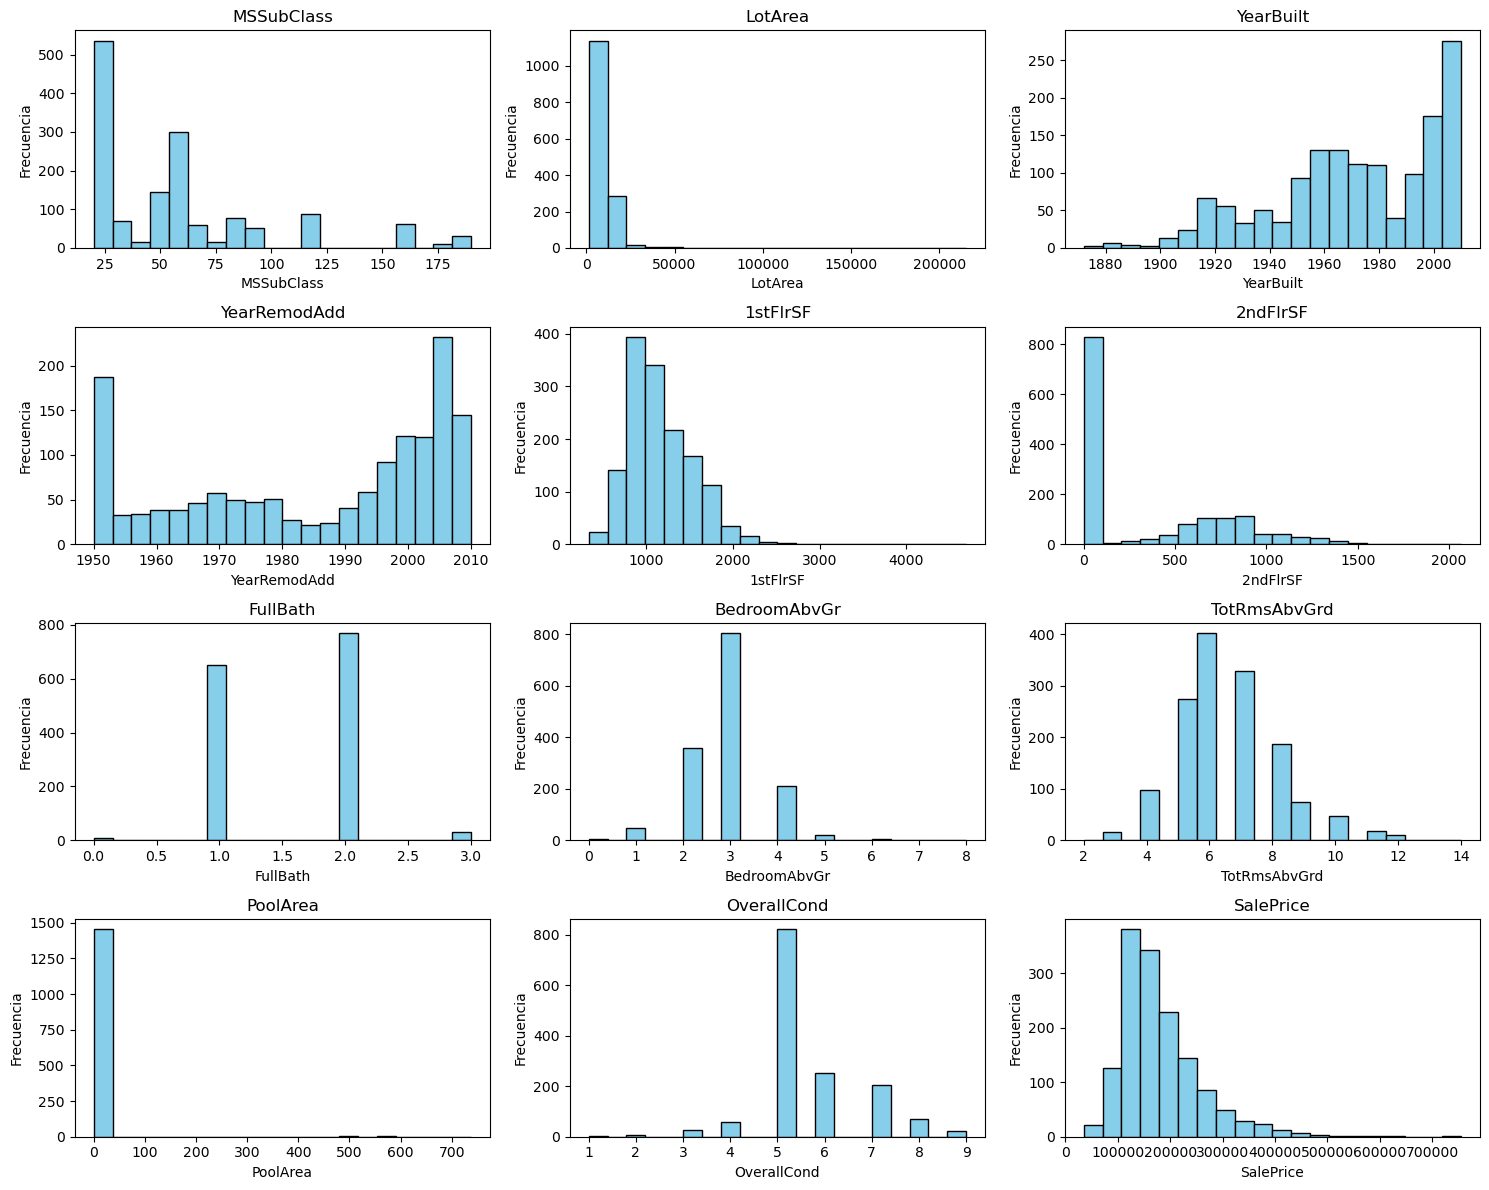

In [150]:
# Lista de columnas específicas, incluyendo 'SalePrice'
columnas = ['MSSubClass', 'LotArea', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 
            'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'PoolArea','OverallCond', 'SalePrice']

# Configuración de la cuadrícula
plt.figure(figsize=(15, 12))
for i, columna in enumerate(columnas, 1):
    plt.subplot(4, 3, i)  # Crear una cuadrícula de 4 filas y 3 columnas
    plt.hist(data[columna].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(columna)
    plt.xlabel(columna)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

### Optimizacion de datos numericos despues de observar los graficos

In [151]:
# Despues de mirar los graficos verificamos si podemos optimizar los valores de algunas columnas
price_exp = data[data['SalePrice'] > 600_000]

# Ver los resultados
print(price_exp)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
691    692          60       RL        104.0    21535   Pave   NaN      IR1   
898    899          20       RL        100.0    12919   Pave   NaN      IR1   
1169  1170          60       RL        118.0    35760   Pave   NaN      IR1   
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
691          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
898          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1169         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1182         Lvl    AllPub  ...      555     Ex  MnPrv         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
691       1   2007        WD         Normal     755000  
898       3   2010       New        Partial     611657  
1169      7   2006        WD         Norma

In [152]:
data = data[data['SalePrice'] <= 600_000]

### Graficos de variables/Precio

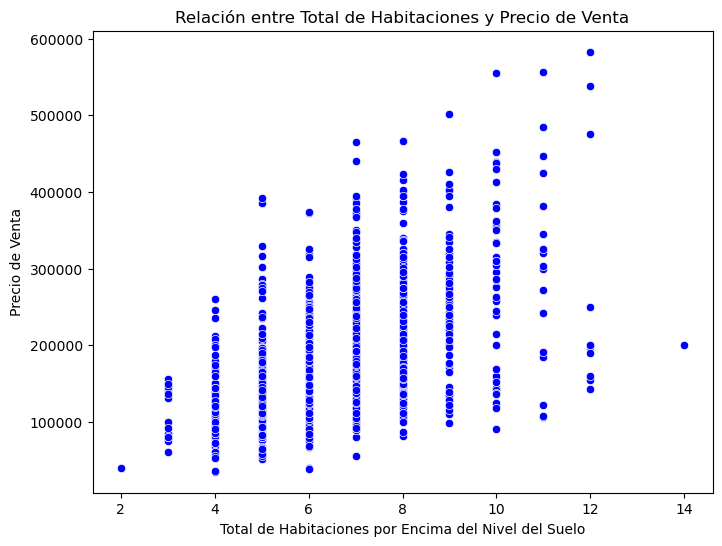

In [153]:
# Gráfico de dispersión "Relación entre Total de Habitaciones y Precio de Venta"
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['TotRmsAbvGrd'], y=data['SalePrice'], color='blue')
plt.title('Relación entre Total de Habitaciones y Precio de Venta')
plt.xlabel('Total de Habitaciones por Encima del Nivel del Suelo')
plt.ylabel('Precio de Venta')
plt.show()

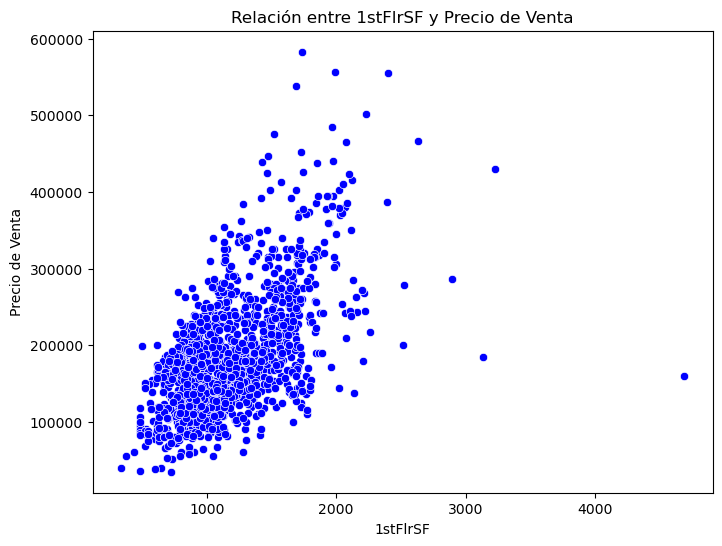

In [154]:
# Gráfico de dispersión "Relación entre area del primer piso y Precio de Venta"
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['1stFlrSF'], y=data['SalePrice'], color='blue')
plt.title('Relación entre 1stFlrSF y Precio de Venta')
plt.xlabel('1stFlrSF')
plt.ylabel('Precio de Venta')
plt.show()

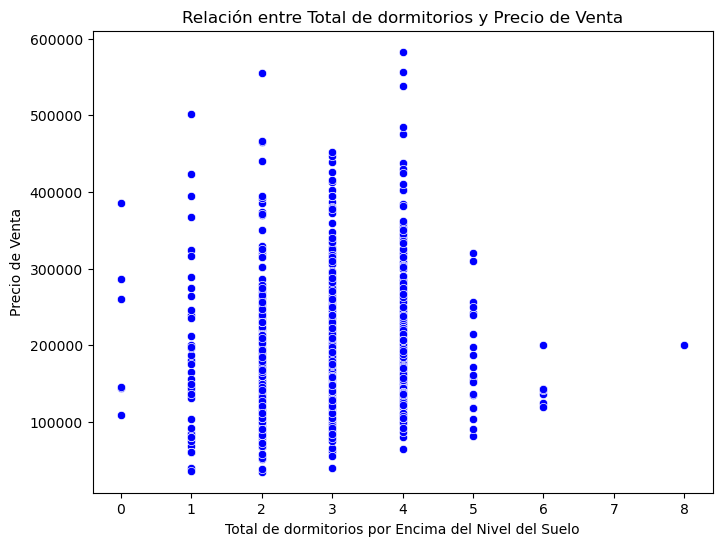

In [155]:
# Gráfico de dispersión "Relación entre Total de Dormitorios y Precio de Venta"
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['BedroomAbvGr'], y=data['SalePrice'], color='blue')
plt.title('Relación entre Total de dormitorios y Precio de Venta')
plt.xlabel('Total de dormitorios por Encima del Nivel del Suelo')
plt.ylabel('Precio de Venta')
plt.show()

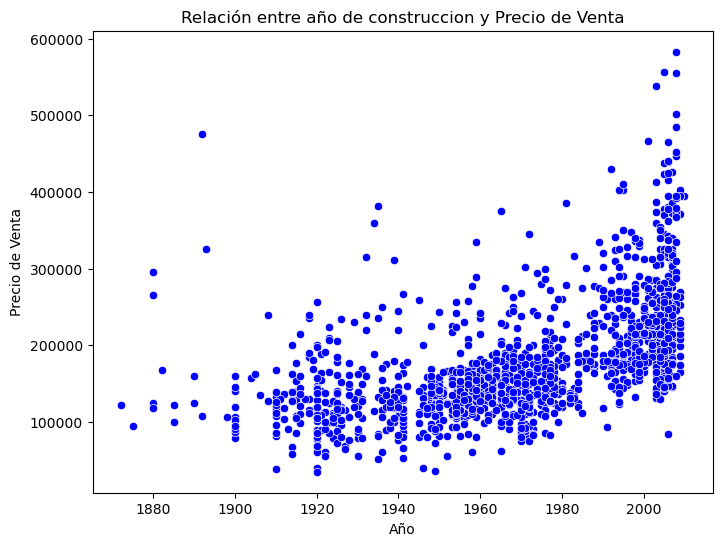

In [156]:
# Gráfico de dispersión "Año de construccion y Precio de Venta"
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['YearBuilt'], y=data['SalePrice'], color='blue')
plt.title('Relación entre año de construccion y Precio de Venta')
plt.xlabel('Año')
plt.ylabel('Precio de Venta')
plt.show()

# 3) Implementación de Modelos:

## Modelos de Regresión, Evaluación de Modelos y Comparación de Rendimiento:

### Regresion Lineal

In [157]:
# Definir las columnas numéricas y categóricas
columnas_num = ['MSSubClass', 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'TotRmsAbvGrd']
columnas_cat = ['MSZoning', 'Street', 'OverallCond', 'BldgType', 'Utilities', 'HeatingQC', 'CentralAir']

# Separar las características y la variable objetivo en el conjunto de entrenamiento
X_train = data.drop('SalePrice', axis=1)
y_train = data['SalePrice']
X_test = datatest  # Características del conjunto de prueba (sin SalePrice)

# Preprocesamiento: escalar las variables numéricas y codificar las categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columnas_num),
        ('cat', OneHotEncoder(handle_unknown='ignore'), columnas_cat)
    ])

# Crear el pipeline que incluye el preprocesamiento y el modelo de regresión lineal
model_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Entrenar el modelo de regresión lineal con los datos de entrenamiento
model_lr.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_lr = model_lr.predict(X_test)

# Guardar las predicciones en un archivo CSV, usando la columna 'Id' para identificar cada predicción
predictions_df = pd.DataFrame({'Id': datatest['Id'], 'SalePrice': y_pred_lr})
predictions_df.to_csv('predictions_linear_regression.csv', index=False)

print("Predicciones realizadas y guardadas en 'predictions_linear_regression.csv'.")

Predicciones realizadas y guardadas en 'predictions_linear_regression.csv'.


#### Predecimos solo sobre train.csv para sacar el mse y el r2

In [158]:
# Dividir 'data' en conjuntos de entrenamiento y validación
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
model_lr.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
y_val_pred = model_lr.predict(X_val)

# Calcular el MSE y el R² en el conjunto de validación
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f'Mean Squared Error (MSE) {mse}')
print(f'R² {r2}')

Mean Squared Error (MSE) 1238664787.147512
R² 0.7829432293605281


### K-Nearest Neighbors (KNN):

In [159]:
# Definir las columnas numéricas y categóricas
columnas_num = ['MSSubClass', 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'TotRmsAbvGrd']
columnas_cat = ['MSZoning', 'Street', 'OverallCond', 'BldgType', 'Utilities', 'HeatingQC', 'CentralAir']

# Separar las características y la variable objetivo en el conjunto de entrenamiento
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento: escalar las variables numéricas y codificar las categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columnas_num),
        ('cat', OneHotEncoder(), columnas_cat)
    ])

# Pipeline para KNN
model_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=5))  # Puedes ajustar n_neighbors
])

# Entrenar y evaluar el modelo KNN
model_knn.fit(X_train, y_train)
y_val_pred_knn = model_knn.predict(X_val)
mse_knn = mean_squared_error(y_val, y_val_pred_knn)
r2_knn = r2_score(y_val, y_val_pred_knn)
print(f'MSE: {mse_knn}, R²: {r2_knn}')

# Hacer predicciones en el conjunto de prueba (testdata) y guardar resultados
y_pred_test_knn = model_knn.predict(datatest)

# Guardar las predicciones en un archivo CSV
predictions_knn_df = pd.DataFrame({'Id': datatest['Id'], 'SalePrice': y_pred_test_knn})
predictions_knn_df.to_csv('predictions_knn.csv', index=False)

print("Predicciones para testdata guardadas en 'predictions_knn.csv'.")


MSE: 1085901758.7853425, R²: 0.8097125780603953
Predicciones para testdata guardadas en 'predictions_knn.csv'.


# Conclusion


## Resultados de Regresion Lineal:
* MSE : 1851141993.89138
* R² Score: 0.7586618946979266

## Resultados de Knn
* MSE: 1415212980.639863 
* R²: 0.8154950725154554

Podemos observar un mejor resultado de la prediccion utilizando el KNN , ya que el MSE es menor y el R² es mayor

